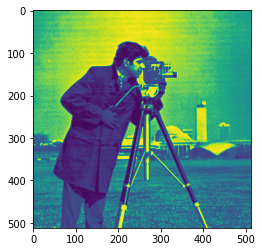

In [11]:
# 1. Enhances contrast in large almost uniform regions.
import skimage
from skimage import data
from skimage import exposure
from matplotlib import pyplot as plt
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)
plt.imshow(camera_equalized)

In [12]:
# 2. Data Set reading
from sklearn import datasets
# Load data
iris= datasets.load_iris()
# Print shape of data to confirm data is loaded
print(iris.data.shape)

(150, 4)


In [13]:
# 3. Train and Test Split

X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.4, random_state=1
)


In [14]:
# 4. USing svm

from sklearn import svm
from sklearn import metrics
classifier_svm = svm.LinearSVC()
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)

# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Providing sample data and the model will make prediction out of that data

sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_svm.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)

Accuracy: 0.9166666666666666
Predictions: ['setosa', 'virginica']


/home/vaish/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [15]:
# 5. Linear Regression

from sklearn import linear_model
reg = linear_model.LinearRegression()
# use it to fit a data
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
# Let's look into the fitted data
print(reg.coef_)

[0.5 0.5]


In [16]:
# 6. Binarisation - Convert numerical values into boolean values

import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)
data_binarized = preprocessing.Binarizer(threshold=0.5).transform(input_data)
print("Binarized data:\n", data_binarized)

Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [17]:
# 7. Removal of mean

import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)

#displaying the mean and the standard deviation of the input data

print("Mean =", input_data.mean(axis=0))
print("Stddeviation = ", input_data.std(axis=0))

#Removing the mean and the standard deviation of the input data

data_scaled = preprocessing.scale(input_data)
print("Mean_removed =", data_scaled.mean(axis=0))
print("Stddeviation_removed =", data_scaled.std(axis=0))

Mean = [ 1.75  -1.275  2.2  ]
Stddeviation =  [2.71431391 4.20022321 4.69414529]
Mean_removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Stddeviation_removed = [1. 1. 1.]


In [18]:
# 8. Scaling

import numpy as np
from sklearn import preprocessing
Input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


In [19]:
# 9. Normalisation

import numpy as np
from sklearn import preprocessing
Input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


In [20]:
# 10. Pipelining

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.tree import DecisionTreeClassifier 
# import some data within sklearn for iris classification  
iris = datasets.load_iris() 
X = iris.data  
y = iris.target 
  
# Splitting data into train and testing part 
# The 25 % of data is test size of the data  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

# importing pipes for making the Pipe flow 

from sklearn.pipeline import Pipeline 

# pipe flow is : 
# PCA(Dimention reduction to two) -> Scaling the data -> DecisionTreeClassification 

pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True) 
  
# fitting the data in the pipe 

pipe.fit(X_train, y_train) 
  
# scoring data  

from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
0.868421052631579


In [21]:
# 11. Cross val score

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores 

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [24]:
# 12. Single metric cross validate

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

cv_results = cross_validate(lasso, X, y, cv=3)
print(sorted(cv_results.keys()))

print(cv_results['test_score'])


['fit_time', 'score_time', 'test_score']
[0.33150734 0.08022311 0.03531764]


In [25]:
# 13. Multiple metric cross validate

scores = cross_validate(lasso, X, y, cv=3,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])


[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]


In [26]:
# 14. Confusion matrix

from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [28]:
# 15. Accuracy Score

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0] 
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0] 
results = confusion_matrix(actual, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted) )

Confusion Matrix :
[[4 2]
 [1 3]]
Accuracy Score : 0.7
Report : 
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [29]:
# 16. Report

from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


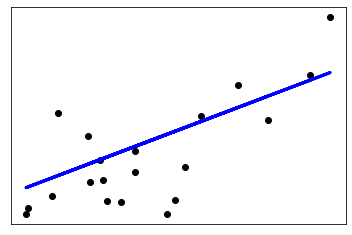

In [30]:
# 17. Linear regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
# 18. Load Digits

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [34]:
# 19. Eliptic envelope

import numpy as np
from sklearn.covariance import EllipticEnvelope
true_cov = np.array([[.5, .6],[.6, .4]])
X = np.random.RandomState(0).multivariate_normal(mean = [0, 0], cov=true_cov,size=500)
cov = EllipticEnvelope(random_state = 0).fit(X)
# Now we can use predict method. It will return 1 for an inlier and -1 for an outlier.
cov.predict([[0, 0],[2, 2]]) 

<ipython-input-34-ba0df6672c1b>:6: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.RandomState(0).multivariate_normal(mean = [0, 0], cov=true_cov,size=500)


array([ 1, -1])

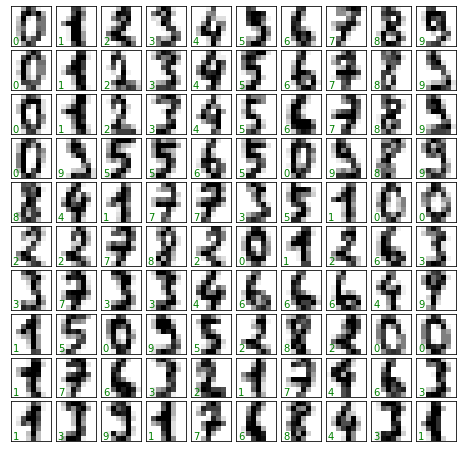

In [36]:
# 20. Number finding

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [39]:
# 21. Isolation forest

from sklearn.ensemble import IsolationForest

X = np.array([[-1, -2], [-3, -3], [-3, -4], [0, 0], [-50, 60]])
OUTDClf = IsolationForest(n_estimators = 10)
OUTDClf.fit(X) 

IsolationForest(n_estimators=10)

In [41]:
# 22. Mainfold

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [44]:
# 23. Dimensionality Reduction

from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
X, _ = load_digits(return_X_y=True)
print(X.shape)
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
print(X_transformed.shape)
 


(1797, 64)
(100, 2)


In [48]:
# 24. Random projection

import numpy as np
from sklearn import random_projection
range = np.random.RandomState(0)
X = range.rand(10,2000)
X = np.array(X, dtype = 'float32')
print(X.dtype)
Transformer_data = random_projection.GaussianRandomProjection()
X_new = Transformer_data.fit_transform(X)
print(X_new.dtype )

float32
float64


In [50]:
# 25. Naive Bayes classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])
train, test, train_labels, test_labels = train_test_split(
features,labels,test_size = 0.40, random_state = 42
)
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(train, train_labels)
preds = GNBclf.predict(test)
print(preds) 

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]
